In [38]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
# Load Data
dtypes = {'column_name_6':'int64', 'column_name_7':'float64', 'column_name_8':'float64'}

aviation = pd.read_csv('Data/AviationData.csv', encoding='ISO-8859-1', dtype=dtypes, parse_dates=['Event.Date'], low_memory=False)
pd.options.mode.chained_assignment = None


In [40]:
# View DataFrame

aviation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      88889 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88837 non-null  object        
 5   Country                 88663 non-null  object        
 6   Latitude                34382 non-null  object        
 7   Longitude               34373 non-null  object        
 8   Airport.Code            50249 non-null  object        
 9   Airport.Name            52790 non-null  object        
 10  Injury.Severity         87889 non-null  object        
 11  Aircraft.damage         85695 non-null  object        
 12  Aircraft.Category       32287 non-null  object

In [41]:
# Making a copy of existing Dataframe to work on

aviation_cleaned = aviation.copy()

In [42]:
# Stack Overflow code to pull only the Year out of Event.Date

aviation_cleaned["Year"] = pd.DatetimeIndex(aviation_cleaned["Event.Date"]).year

In [43]:
# Removing all years prior to 2002 when the Aviation and Transportation Security Act went into effect

aviation_cleaned = aviation_cleaned[(aviation_cleaned["Year"] >= 2002) & (aviation_cleaned["Country"] == "United States")]
aviation_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31865 entries, 51958 to 88888
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                31865 non-null  object        
 1   Investigation.Type      31865 non-null  object        
 2   Accident.Number         31865 non-null  object        
 3   Event.Date              31865 non-null  datetime64[ns]
 4   Location                31858 non-null  object        
 5   Country                 31865 non-null  object        
 6   Latitude                31266 non-null  object        
 7   Longitude               31256 non-null  object        
 8   Airport.Code            21667 non-null  object        
 9   Airport.Name            21849 non-null  object        
 10  Injury.Severity         31757 non-null  object        
 11  Aircraft.damage         31001 non-null  object        
 12  Aircraft.Category       24374 non-null  ob

In [44]:
# Filling Nulls in the Make column so we can manipulate it more easily

aviation_cleaned["Make"].fillna("other", inplace = True)

In [45]:
# Check that the Nulls are filled

aviation_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31865 entries, 51958 to 88888
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                31865 non-null  object        
 1   Investigation.Type      31865 non-null  object        
 2   Accident.Number         31865 non-null  object        
 3   Event.Date              31865 non-null  datetime64[ns]
 4   Location                31858 non-null  object        
 5   Country                 31865 non-null  object        
 6   Latitude                31266 non-null  object        
 7   Longitude               31256 non-null  object        
 8   Airport.Code            21667 non-null  object        
 9   Airport.Name            21849 non-null  object        
 10  Injury.Severity         31757 non-null  object        
 11  Aircraft.damage         31001 non-null  object        
 12  Aircraft.Category       24374 non-null  ob

In [46]:
# Changing all the Make column into lowercase strings for ease of manipulation and analysis

aviation_cleaned["Make"] = aviation_cleaned["Make"].str.lower()

# Eliminating periods from the column observations

aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('.', '', regex=False)

# Cleaning Data

aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('beech', 'beechcraft', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('hawker beechcraft corp', 'beechcraft', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('hawker beechcraft corporation', 'beechcraft', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('hawker-beechcraft corporation', 'beechcraft', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('hawker beechcraft', 'beechcraft', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('beech aircraft corporation', 'beechcraft', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('beech corporation', 'beechcraft', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('beech aircraft', 'beechcraft', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('beech aircraft co', 'beechcraft', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('hawker beech', 'beechcraft', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('hawker-beechcraft', 'beechcraft', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('beech aircraft corp', 'beechcraft', regex=False)

aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('boeing stearman', 'boeing', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('boeing-stearman', 'boeing', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('boeing (stearman)', 'boeing', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('boeing company', 'boeing', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('boeing company, long beach div', 'boeing', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('the boeing company', 'boeing', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('boeing-vertol', 'boeing', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('boeing 777-306er', 'boeing', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('boeing commercial airplane gro', 'boeing', regex=False)

aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('airbus industrie', 'airbus', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('airbus industries', 'airbus', regex=False)

aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('bombardier', 'bombardier', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('bombardier inc', 'bombardier', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('bombardier aerospace, inc', 'bombardier', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('learjet', 'bombardier', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('learjet inc', 'bombardier', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('bombardier, inc', 'bombardier', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('bombardier learjet corp', 'bombardier', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('gates learjet', 'bombardier', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('gates learjet corporation', 'bombardier', regex=False)


In [47]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
aviation_cleaned['Make'].value_counts()

cessna                            8391
piper                             4753
beechcraft                        1771
bell                               794
boeing                             581
mooney                             473
robinson                           451
bellanca                           283
schweizer                          272
air tractor                        266
cirrus design corp                 266
hughes                             254
maule                              253
aeronca                            238
robinson helicopter                228
air tractor inc                    225
grumman                            184
robinson helicopter company        181
champion                           178
airbus                             173
luscombe                           169
stinson                            163
bombardier                         163
north american                     152
eurocopter                         151
taylorcraft              

In [48]:
# Creating a new Dataframe contianing only the top four

top_four = aviation_cleaned.loc[(aviation_cleaned["Make"].isin(["boeing", "airbus", "bombardier", "beechcraft"]))]

In [49]:
# Filling null values with 0 in Total.Fatal.Injuries column 

top_four["Total.Fatal.Injuries"].fillna(0, inplace = True)

In [53]:
# top_four.to_csv("top_four.csv",  encoding='utf-8')

In [50]:
incident_counts = top_four["Make"].value_counts()
incident_counts

beechcraft    1771
boeing         581
airbus         173
bombardier     163
Name: Make, dtype: int64

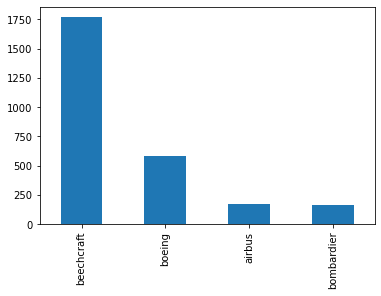

In [51]:
incident_counts.plot(kind="bar");

In [63]:
beechcraft_fatal_injuries = top_four.loc[top_four['Make'] == 'beechcraft', ['Total.Fatal.Injuries']].sum()
boeing_fatal_injuries = top_four.loc[top_four['Make'] == 'boeing', ['Total.Fatal.Injuries']].sum()
airbus_fatal_injuries = top_four.loc[top_four['Make'] == 'airbus', ['Total.Fatal.Injuries']].sum()
bombardier_fatal_injuries = top_four.loc[top_four['Make'] == 'bombardier', ['Total.Fatal.Injuries']].sum()

top_four.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year
51961,20020104X00037,Accident,SEA02FA023,2002-01-02,"BOISE, ID",United States,NaN,NaN,BOI,Boise Air Terminal (Gowen Fld),Non-Fatal,Substantial,NaN,N132Z,beechcraft,58P,No,2.0,Reciprocating,NaN,NaN,Flight Test,NaN,0.0,NaN,NaN,2.0,VMC,Takeoff,Probable Cause,04-11-2002,2002
51962,20020110X00051,Accident,ATL02LA029,2002-01-02,"GREENVILLE, SC",United States,34.885833,-82.2175,GSP,Greer-Greenville Spartanburg,Non-Fatal,Substantial,NaN,N262FE,boeing,727-200,No,3.0,Turbo Fan,NaN,NSCH,NaN,NaN,0.0,NaN,NaN,3.0,IMC,Taxi,Probable Cause,25-07-2002,2002
51965,20020110X00056,Incident,FTW02IA061,2002-01-03,"Houston, TX",United States,29.980278,-95.339722,IAH,Bush Intercontinental Airport,Incident,Minor,NaN,F-GCBG,boeing,747-228F,No,4.0,Turbo Fan,NaN,SCHD,NaN,NaN,0.0,NaN,NaN,3.0,VMC,Taxi,Probable Cause,24-01-2005,2002
51972,20020108X00047,Accident,FTW02FA062,2002-01-05,"Oak Grove, LA",United States,32.963611,-91.418056,27A7,Costello,Fatal(1),Destroyed,NaN,N77RY,beechcraft,95-B55,No,2.0,Reciprocating,NaN,NaN,Personal,NaN,1.0,NaN,NaN,NaN,IMC,Maneuvering,Probable Cause,01-04-2003,2002
51977,20020110X00059,Accident,CHI02LA051,2002-01-06,"Angola, IN",United States,41.635555,-85.094444,ANQ,Tri-State Stuben County,Non-Fatal,Destroyed,NaN,N7915K,beechcraft,S35,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,0.0,NaN,NaN,3.0,VMC,Approach,Probable Cause,06-12-2002,2002


TypeError: list expected at most 1 argument, got 4

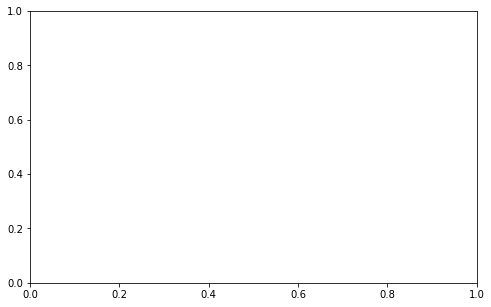

In [62]:
fig, ax = plt.subplots(figsize=(8, 5))

make = top_four["Make"].value_counts().index
fatalities = list(beechcraft_fatal_injuries, boeing_fatal_injuries, airbus_fatal_injuries, bombardier_fatal_injuries)

ax.bar(make, fatalities)
ax.set_title('Total Fatalities by Airplane Manufacturer')
ax.set_xlabel('Manufacturer')
ax.set_ylabel('Total Fatalities');